# Scoring New Data

## 1. Importing Necessary Libraries

In [52]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import scipy.stats as stats
import joblib

In [2]:
# Loading the new data to be scored
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\raw_data\\test.csv")

In [3]:
# visualizing the new data to be scored
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# shape of the new dataframe
df.shape

(1459, 80)

## 2. Feature Engineering

First we need to transform the data. Below the list of transformations that we did during the Feature Engineering phase:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
6. Put the variables in a similar scale

### 2.1 Missing Value

##### 2.1.1 Categorical Variables
- Replace missing values with the string "missing" in those variables with a lot of missing data. 
- Replace missing data with the most frequent category in those variables that contain fewer observations without values. 

In [5]:
# first let's cast MSSubClass as an object
df["MSSubClass"] = df["MSSubClass"].astype("object") 

In [6]:
# from the feature engineering part missing bariables to be filled by string missing and filled by frequent were:
cat_vars_with_missing = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_vars_with_frequent = {
    'MasVnrType': 'None',
    'BsmtQual': 'TA',
    'BsmtCond': 'TA',
    'BsmtExposure': 'No',
    'BsmtFinType1': 'Unf',
    'BsmtFinType2': 'Unf',
    'Electrical': 'SBrkr',
    'GarageType': 'Attchd',
    'GarageFinish': 'Unf',
    'GarageQual': 'TA',
    'GarageCond': 'TA',
}

In [7]:
# Now let's fill the missing values with those formats accordingly
df[cat_vars_with_missing] = df[cat_vars_with_missing].fillna("Missing")
for var in cat_vars_with_frequent.keys():
    mode = cat_vars_with_frequent[var]
    df[var] = df[var].fillna(mode)

In [8]:
# now let's check there are no missing values in all categorical columns

[var for var in df.select_dtypes("object").columns if df[var].isnull().sum()>0]

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

##### 2.1.2 Numerical Variables
To engineer missing values in numerical variables, we will:

- add a binary missing value indicator variable
- and then replace the missing values in the original variable with the mean

In [9]:
num_vars_with_na = ['LotFrontage', 'MasVnrArea']

In [10]:
vars_with_na_dict = {
    'LotFrontage': 69.87974098057354,
    'MasVnrArea': 103.7974006116208
}

In [11]:
# now let's replace missing values with those values
for var in vars_with_na_dict.keys():
    mean = vars_with_na_dict[var]
    # first let's add a binary missing value indicator
    df[var + "_na"] = np.where(df[var].isnull(),1,0)
    # now let's fill the missing values 
    df[var].fillna(mean, inplace = True)

In [12]:
# now let's visualize the missing value dataframe
df[['LotFrontage_na', 'MasVnrArea_na']].head()

,LotFrontage_na,MasVnrArea_na
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [13]:
df[num_vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [14]:
# now let's do same for the year variable
temp_var_with_na = {"GarageYrBlt":2005.0}

In [15]:
# now let's fill the missing values by adding a binary missing value indicators too
# now let's replace missing values with those values
for var in temp_var_with_na.keys():
    mode = temp_var_with_na[var]
    # first let's add a binary missing value indicator
    df[var + "_na"] = np.where(df[var].isnull(),1,0)
    # now let's fill the missing values 
    df[var].fillna(mode, inplace = True)

In [16]:
# let's visualize the missing value indicators data frame in the temp vars
df[["GarageYrBlt_na"]].head()

,GarageYrBlt_na
0,0
1,0
2,0
3,0
4,0


### 2.2 Temporal variables

Capture elapsed time

We need to capture the time elapsed between those variables and the year in which the house was sold:

In [17]:
year_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
def capture_elapsed_time(data, var):
    data[var] = data["YrSold"] - data[var]
    return data
    
for var in year_vars:
    capture_elapsed_time(df, var)

In [18]:
# let's visualize the years data frame
df[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [19]:
# now let's drop the year sold column
df.drop("YrSold", axis = 1, inplace = True)

### 2.3 Numerical variable transformation

##### 2.3.1 Logarithmic transformation

We will transform with the logarithm the positive numerical variables in order to get a more Gaussian-like distribution.

In [20]:
# let's apply a logarithmic transformation
for var in ['LotFrontage','1stFlrSF', 'GrLivArea']:
    df[var] = np.log(df[var])

#### 2.3.2 Yeo-Johnson transformation

We will apply the Yeo-Johnson transformation to LotArea.

In [21]:
df["LotArea"] = stats.yeojohnson(df["LotArea"], lmbda = 0.01775557036572992)

#### 2.3.3 Binarize skewed variables

There were a few variables very skewed, we would transform those into binary variables.

In [22]:
skewed_vars = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed_vars:
    df[var] = np.where(df[var] == 0 , 0 ,1)

### 2.4 Categorical variables

##### 2.4.1 Apply mappings

We remap variables with specific meanings into a numerical scale.

In [23]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [24]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [25]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [26]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [27]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [28]:
# check absence of na in the data set

with_null = [var for var in df.columns if df[var].isnull().sum() > 0]

with_null

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

There are quite a few variables with missing data!!

In [29]:
# did those have missing data in the train set?

[var for var in with_null if var in list(
    cat_vars_with_frequent.keys())+cat_vars_with_missing+list(vars_with_na_dict.keys()) + list(temp_var_with_na.keys())]

[]

#### 2.4.2 Removing Rare Labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations into a "Rare" string.

In [30]:
# create a dictionary with the most frequent categories per variable

# note the amount of hard coding that I need to do.

# Can you think of an alternative? Perhaps we could have save this as a numpy pickle
# and load it here, instead of hard-coding.

# But that means that we need to go back to the Feature Engineering notebook, and change
# the code so that we store the pickle. So there is still some code changes that we need

frequent_ls = {
    'MSZoning': ['FV', 'RH', 'RL', 'RM'],
    'Street': ['Pave'],
    'Alley': ['Grvl', 'Missing', 'Pave'],
    'LotShape': ['IR1', 'IR2', 'Reg'],
    'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'],
    'Utilities': ['AllPub'],
    'LotConfig': ['Corner', 'CulDSac', 'FR2', 'Inside'],
    'LandSlope': ['Gtl', 'Mod'],
    'Neighborhood': ['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
                     'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
                     'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
                     'Somerst', 'StoneBr', 'Timber'],

    'Condition1': ['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'],
    'Condition2': ['Norm'],
    'BldgType': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
    'HouseStyle': ['1.5Fin', '1Story', '2Story', 'SFoyer', 'SLvl'],
    'RoofStyle': ['Gable', 'Hip'],
    'RoofMatl': ['CompShg'],
    'Exterior1st': ['AsbShng', 'BrkFace', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood',
                    'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],

    'Exterior2nd': ['AsbShng', 'BrkFace', 'CmentBd', 'HdBoard', 'MetalSd', 'Plywood',
                    'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],

    'MasVnrType': ['BrkFace', 'None', 'Stone'],
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab'],
    'Heating': ['GasA', 'GasW'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['FuseA', 'FuseF', 'SBrkr'],
    'Functional': ['Min1', 'Min2', 'Mod', 'Typ'],
    'GarageType': ['Attchd', 'Basment', 'BuiltIn', 'Detchd'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['Missing'],
    'MiscFeature': ['Missing', 'Shed'],
    'SaleType': ['COD', 'New', 'WD'],
    'SaleCondition': ['Abnorml', 'Family', 'Normal', 'Partial'],
    'MSSubClass': ['20', '30', '50', '60', '70', '75', '80', '85', '90', '120', '160', '190'],
}

In [31]:
# now let's replace rare lables with string "Rare"

for var in frequent_ls.keys():
    df[var] = np.where(df[var].isin(frequent_ls), df[var], "Rare")

#### 2.4.3 Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. 

In [32]:
# we need the mappings learned from the train set. Otherwise, our model is going
# to produce inaccurate results

# note the amount of hard coding that we need to do.

# Can you think of an alternative? 

# Perhaps we could have save this as a numpy pickle
# and load it here, instead of hard-coding.

# But that means that we need to go back to the Feature Engineering notebook, and change
# the code so that we store the pickle. So there is still some code changes that we need

ordinal_mappings = {
    'MSZoning': {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4},
    'Street': {'Rare': 0, 'Pave': 1},
    'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2},
    'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3},
    'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
    'Utilities': {'Rare': 0, 'AllPub': 1},
    'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4},
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Rare': 2},
    'Neighborhood': {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3,
                     'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7,
                     'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11,
                     'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15,
                     'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19,
                     'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22},
    
    'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5},
    'Condition2': {'Rare': 0, 'Norm': 1},
    'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4},
    'HouseStyle': {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5},
    'RoofStyle': {'Gable': 0, 'Rare': 1, 'Hip': 2},
    'RoofMatl': {'CompShg': 0, 'Rare': 1},
    'Exterior1st': {'AsbShng': 0, 'Wd Sdng': 1, 'WdShing': 2, 'MetalSd': 3,
                    'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7,
                    'BrkFace': 8, 'CemntBd': 9, 'VinylSd': 10},
    
    'Exterior2nd': {'AsbShng': 0, 'Wd Sdng': 1, 'MetalSd': 2, 'Wd Shng': 3,
                    'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7,
                    'BrkFace': 8, 'CmentBd': 9, 'VinylSd': 10},
    
    'MasVnrType': {'Rare': 0, 'None': 1, 'BrkFace': 2, 'Stone': 3},
    'Foundation': {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Rare': 3, 'PConc': 4},
    'Heating': {'Rare': 0, 'GasW': 1, 'GasA': 2},
    'CentralAir': {'N': 0, 'Y': 1},
    'Electrical': {'Rare': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3},
    'Functional': {'Rare': 0, 'Min2': 1, 'Mod': 2, 'Min1': 3, 'Typ': 4},
    'GarageType': {'Rare': 0, 'Detchd': 1, 'Basment': 2, 'Attchd': 3, 'BuiltIn': 4},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'PoolQC': {'Missing': 0, 'Rare': 1},
    'MiscFeature': {'Rare': 0, 'Shed': 1, 'Missing': 2},
    'SaleType': {'COD': 0, 'Rare': 1, 'WD': 2, 'New': 3},
    'SaleCondition': {'Rare': 0, 'Abnorml': 1, 'Family': 2, 'Normal': 3, 'Partial': 4},
    'MSSubClass': {'30': 0, 'Rare': 1, '190': 2, '90': 3, '160': 4, '50': 5, '85': 6,
                   '70': 7, '80': 8, '20': 9, '75': 10, '120': 11, '60': 12},
}

In [33]:
for var in ordinal_mappings.keys():
    ordinal_label = ordinal_mappings[var]
    df[var] = df[var].map(ordinal_label)

In [34]:
# now let's check the abscence of null values in the dataframe
vars_with_na = [var for var in df.columns if df[var].isnull().sum() >0]
vars_with_na

['Alley',
 'LandContour',
 'BldgType',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'PavedDrive']

In [35]:
len(vars_with_na)

13

Still there are 13 featrues with null values , here we handle these featues by just making them 0

In [36]:
# now let's fill those missing values with the value 0
df.fillna(0 , inplace =True) 

### 2.5 Feature Scaling

In [37]:
# first let's load the scaler
scaler = joblib.load("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\models\\minmax_scaler.joblib")

In [40]:
# let's visualize the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1461,1,0,4.382027,10.183593,0,0.0,2,0.0,0,3,2,11,4,0,0.0,2,5,6,49,49,1,1,5,5,0,0.0,3,3,3,3,3,1,3,468.0,2,1,270.0,882.0,0,3,0.0,0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,3.0,5,0,0,0,0,49.0,1,1.0,730.0,3,3,0.0,140,0,0,0,1,0,1,3,0,0,6,1,0,0,0,0
1,1462,1,0,4.394449,10.426141,0,0.0,2,0.0,0,3,2,11,4,0,0.0,2,6,6,52,52,1,1,5,5,0,108.0,3,3,3,3,3,1,5,923.0,1,0,406.0,1329.0,0,3,0.0,0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,4.0,6,0,0,0,0,52.0,1,1.0,312.0,3,3,0.0,393,36,0,0,0,0,1,0,0,1,6,1,0,0,0,0
2,1463,1,0,4.304065,10.389285,0,0.0,2,0.0,0,3,2,11,4,0,0.0,2,5,5,13,12,1,1,5,5,0,0.0,3,3,3,4,3,1,6,791.0,1,0,137.0,928.0,0,4,0.0,0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,3.0,6,0,1,3,0,13.0,3,2.0,482.0,3,3,0.0,212,34,0,0,0,0,1,3,0,0,3,1,0,0,0,0
3,1464,1,0,4.356709,10.003758,0,0.0,2,0.0,0,3,2,11,4,0,0.0,2,6,6,12,12,1,1,5,5,0,20.0,3,3,3,3,3,1,6,602.0,1,0,324.0,926.0,0,5,0.0,0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,4.0,7,0,1,4,0,12.0,3,2.0,470.0,3,3,0.0,360,36,0,0,0,0,1,0,0,0,6,1,0,0,0,0
4,1465,1,0,3.761200,9.196336,0,0.0,2,0.0,0,3,2,11,4,0,0.0,2,8,5,18,18,1,1,5,5,0,0.0,4,3,3,4,3,1,5,263.0,1,0,1017.0,1280.0,0,5,0.0,0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,4.0,5,0,0,0,0,18.0,2,2.0,506.0,3,3,0.0,0,82,0,0,1,0,1,0,0,0,1,1,0,0,0,0


In [41]:
# now let's drop the Id feature
df.drop("Id",axis=1, inplace=True)

In [42]:
# now let's transform the new data with the scaler
df = pd.DataFrame(scaler.transform(df), columns  = df.columns)

Note that we engineered so many variables, when we are actually going to feed only 36 to the model.

**What could we do differently?**

We could have, of course, engineered only the variables that we are going to use in the model. But that means:

- identifying which variables we need
- identifying which transformation we need per variable
- redefining our dictionaries accordingly
- retraining the MinMaxScaler only on the selected variables (at the moment, it is trained on the entire dataset)

That means, that we need to create extra code to train the scaler only on the selected variables. Probably removing the scaler from the Feature Engineering notebook and passing it onto the Feature Selection one.

We need to be really careful in re-writing the code here to make sure we do not forget or engineer wrongly any of the variables.

## 3. Scoring New Data

In [47]:
# load the pre-selected features
# ==============================

features = pd.read_csv('C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\Data\\processed_data\\selected_features.csv')
features = features['0'].to_list() 

# reduce the train and test set to the selected features
df = df[features]

df.shape

(1459, 36)

In [48]:
# first let's load the trained model
model = joblib.load("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\models\\Lasso_Model.joblib")

In [54]:
# let's get the predictions from the test set
pred = model.predict(df)

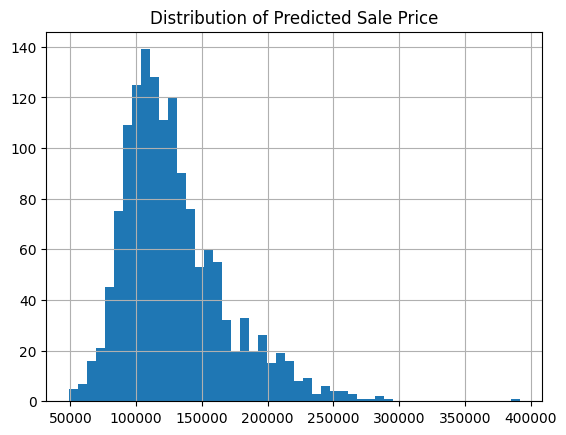

In [56]:
# let's plot the distribution of predicted sale prices
pd.Series(np.exp(pred)).hist(bins=50)
plt.title("Distribution of Predicted Sale Price")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\9.0 End_to_End_House_Price_Prediction\\reports\\figures\\Distribution of Predicted Sale Price.jpg")
plt.show()